Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin1')

In [ ]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#FF00CC")]}
])
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


Data Cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


 Drop the Columns

In [ ]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
styled_df = df.head(5).style
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Rename the Column

In [ ]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

Convert the target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
styled_df = df.head().style
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


 Check Missing values

In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

 Check Duplicate values

In [ ]:
df.duplicated().sum()

403

 Remove Duplicate values

In [ ]:
df = df.drop_duplicates(keep = 'first')

Shape of the Dataset

In [ ]:
df.shape

(5169, 2)

EDA:
Percentage of Ham and Spam

In [ ]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


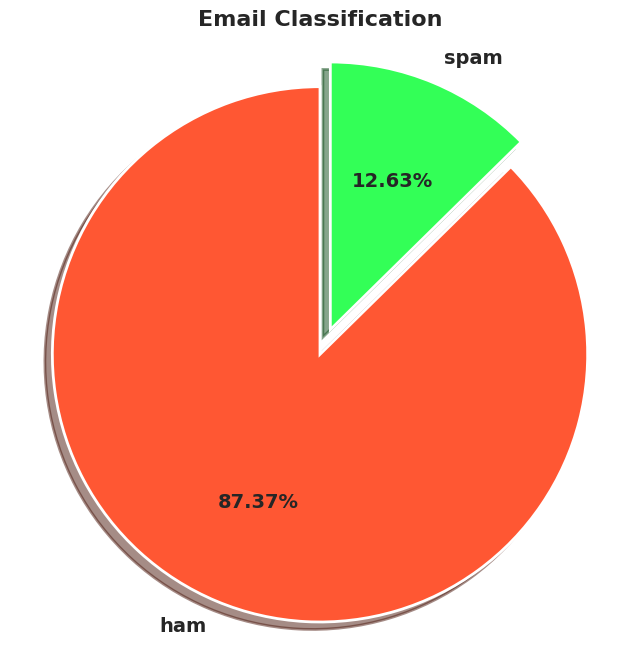

In [ ]:
import matplotlib.pyplot as plt
colors = ['#FF5733', '#33FF57']
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,
    shadow=True
)
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

ax.set_title('Email Classification', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()

Text Length and Structure Analysis

In [ ]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Summary Statistics for Legitimate Messages

In [ ]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


 Summary Statistics for Spam Messages

In [ ]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Character Length Distribution for Legitimate and Spam Messages

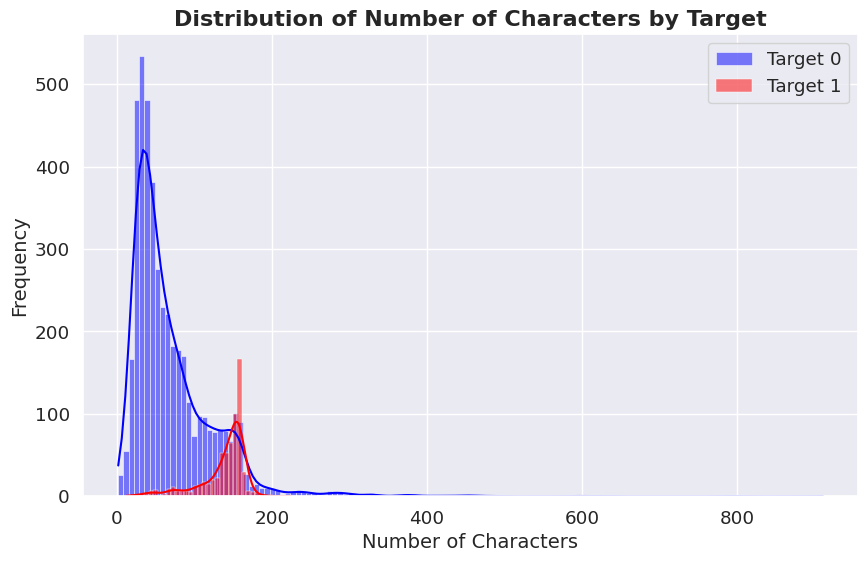

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')
plt.legend()
sns.set(style='whitegrid')
plt.show()

Word Count Distribution for Legitimate and Spam Messages

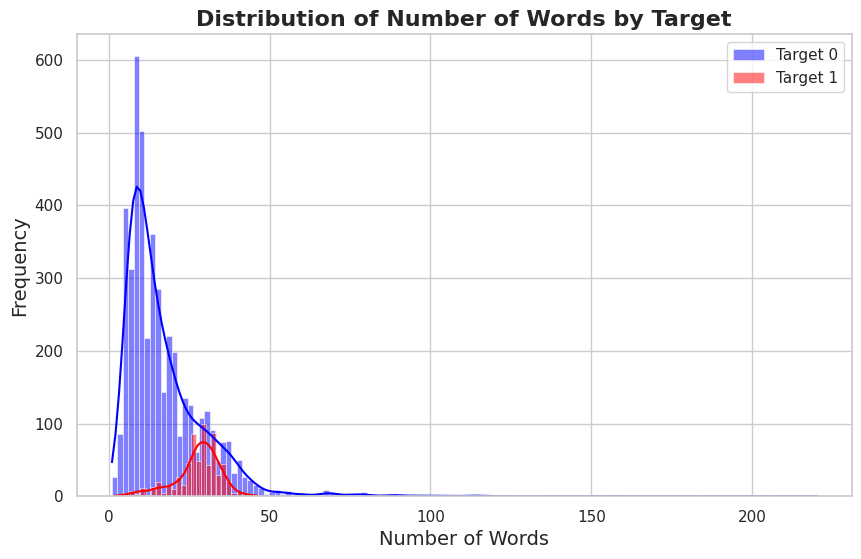

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')
plt.legend()
sns.set(style='whitegrid')
plt.show()

Pairplot for Data Visualization

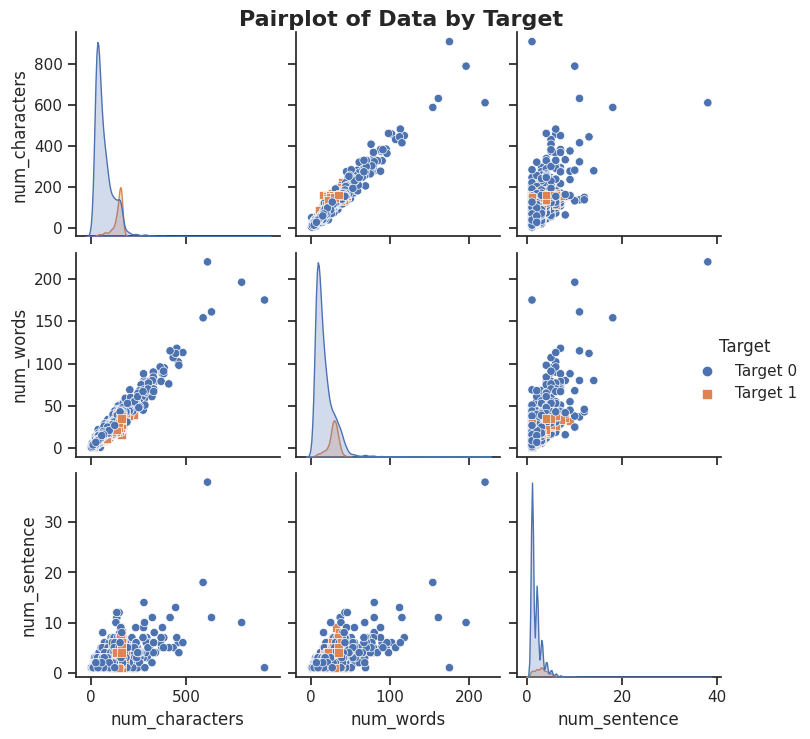

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)
plt.show()

 Coorelation

In [ ]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


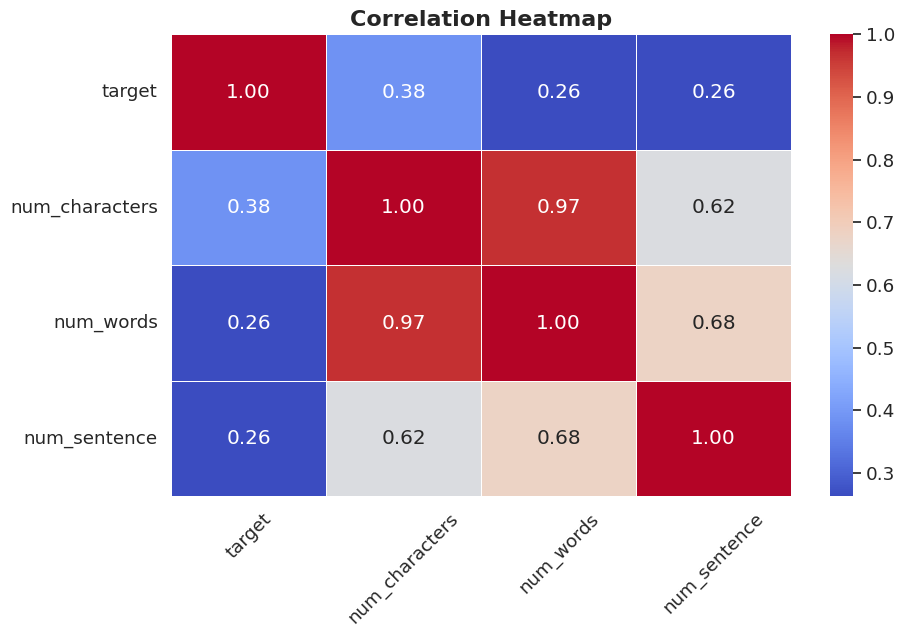

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

Data Preprocessing

In [ ]:
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

Creating a New Column: 'transformed_text'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
styled_df = df.head(5).style
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


Word Cloud for Spam Messages

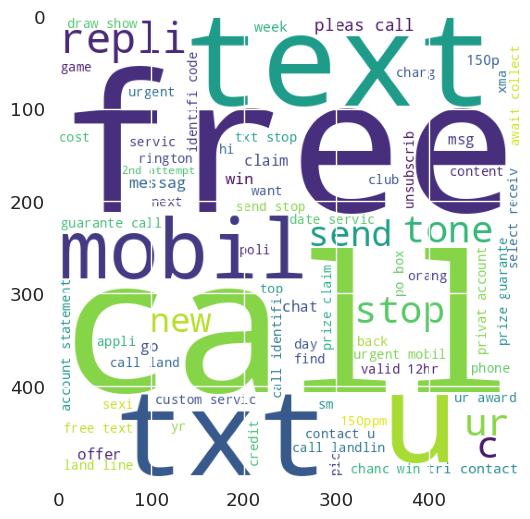

In [ ]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()


Word Cloud for Not spam Messages

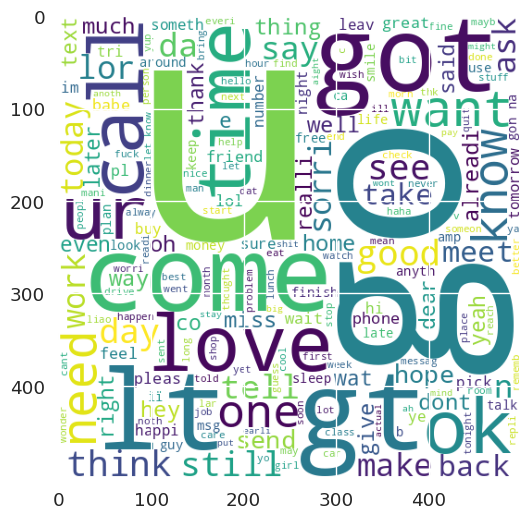

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

Find top 30 words of spam

In [ ]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [ ]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

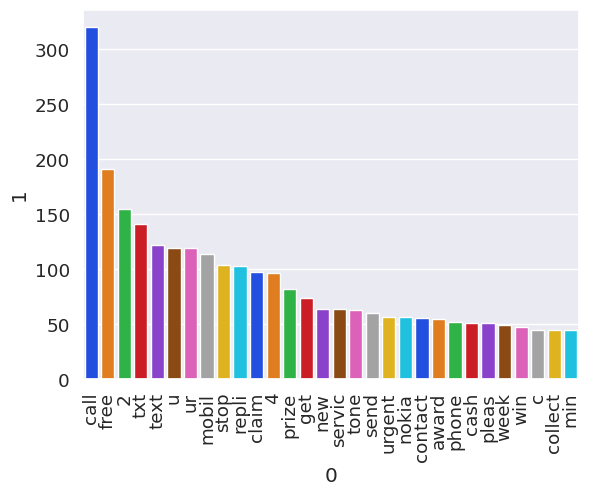

In [ ]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

 Find top 30 words of Not spam Messages

In [ ]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [ ]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

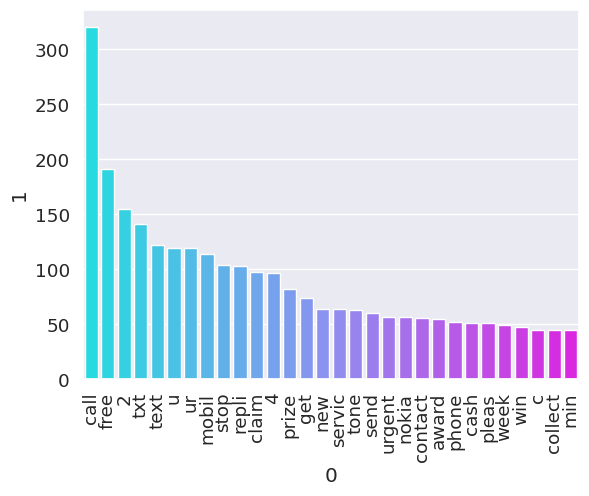

In [ ]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

Model Building

 Initializing CountVectorizer and TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

Dependent and Independent Variable

In [ ]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

 Split into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

Import the Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Initialize the Models

In [ ]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

Dictionary of the Models

In [ ]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

Train the Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

 Evaluate the Models

In [ ]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For:  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865

For:  KNN
Accuracy:  0.9052224371373307
Precision:  1.0

For:  NB
Accuracy:  0.9709864603481625
Precision:  1.0

For:  DT
Accuracy:  0.9274661508704062
Precision:  0.8118811881188119

For:  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703

For:  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829

For:  Adaboost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089

For:  Bgc
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659

For:  ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406

For:  GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192

For:  xgb
Accuracy:  0.9671179883945842
Precision:  0.9333333333333333


 Conclusion :
 Support Vector Classifier (SVC) and Random Forest (RF) demonstrated the highest accuracy, both achieving approximately 97.58%.
Naive Bayes (NB) achieved a perfect precision score, indicating zero false positives.
Other models, including Gradient Boosting, Adaboost, Logistic Regression, and Bagging Classifier, displayed competitive performance with accuracy scores ranging from 94.68% to 96.03%.